In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
zom_data = pd.read_csv('zomato.csv')

In [3]:
zom_data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zom_data.rename(columns={'approx_cost(for two people)':'cost_for_two'},inplace=True)

In [6]:
zom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                51717 non-null object
address            51717 non-null object
name               51717 non-null object
online_order       51717 non-null object
book_table         51717 non-null object
rate               43942 non-null object
votes              51717 non-null int64
phone              50509 non-null object
location           51696 non-null object
rest_type          51490 non-null object
dish_liked         23639 non-null object
cuisines           51672 non-null object
cost_for_two       51371 non-null object
reviews_list       51717 non-null object
menu_item          51717 non-null object
listed_in(type)    51717 non-null object
listed_in(city)    51717 non-null object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


In [7]:
zom_data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


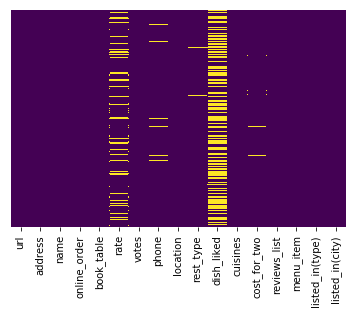

In [10]:
sns.heatmap(zom_data.isnull(),yticklabels=False,cbar=False,cmap='viridis') #missing data in each columns

In [13]:
zom_data.cost_for_two.fillna('0',inplace=True)


In [18]:
zom_data['cost_for_two'].value_counts().sort_values(ascending=True).head(5)

5,000    1
3,700    1
469      1
160      1
60       1
Name: cost_for_two, dtype: int64

In [21]:
zom_data.cost_for_two = zom_data.cost_for_two.str.replace(',', '')


In [25]:
zom_data.cost_for_two = zom_data.cost_for_two.astype('int64')
zom_data.groupby('listed_in(type)')['listed_in(city)'].value_counts()

listed_in(type)     listed_in(city)      
Buffet              Lavelle Road              65
                    Church Street             60
                    Residency Road            59
                    Brigade Road              57
                    MG Road                   54
                    Koramangala 4th Block     45
                    BTM                       39
                    Koramangala 7th Block     39
                    Indiranagar               38
                    Koramangala 5th Block     38
                    Koramangala 6th Block     36
                    Brookefield               33
                    Marathahalli              32
                    Bellandur                 30
                    Jayanagar                 29
                    Old Airport Road          27
                    Sarjapur Road             26
                    JP Nagar                  25
                    Electronic City           22
                    Mallesh

In [31]:
#List of top Restaurants 
zom_data['rate'] = [''.join(c.split()) for c in zom_data['rate'].astype(str)] ###Removes unnecessary spaces###
zom_data['rate'] = zom_data.rate.str.replace('/5','')
zom_data['rate'] = zom_data['rate'].str.replace('-','0')
zom_data['rate'] = zom_data['rate'].str.replace('nan','0')
zom_data['rate'] = zom_data['rate'].str.replace('NEW','0')
zom_data.groupby('rate')['cost_for_two'].value_counts().tail(60)
zom_data.rate.max()
zom_data.groupby([zom_data.rate=='4.9'])['name'].tail()
zom_data.groupby([zom_data.rate=='4.9'])['location','name'].tail()


,location,name
47987,Brigade Road,Belgian Waffle Factory
49170,Sarjapur Road,Byg Brewski Brewing Company
49627,Sarjapur Road,Byg Brewski Brewing Company
50059,Sarjapur Road,Byg Brewski Brewing Company
51042,Whitefield,Flechazo
51712,Whitefield,Best Brews - Four Points by Sheraton Bengaluru...
51713,Whitefield,Vinod Bar And Restaurant
51714,Whitefield,Plunge - Sheraton Grand Bengaluru Whitefield H...
51715,"ITPL Main Road, Whitefield",Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716,"ITPL Main Road, Whitefield",The Nest - The Den Bengaluru
